# Basic plotting with Pandas and Matplotlib

```{attention}
Finnish university students are encouraged to use the CSC Notebooks platform.<br/>
<a href="https://notebooks.csc.fi/#/blueprint/7e62ac3bddf74483b7ac7333721630e2"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>

Others can follow the lesson and fill in their student notebooks using Binder.<br/>
<a href="https://mybinder.org/v2/gh/geo-python/notebooks/master?urlpath=lab/tree/L7/matplotlib.ipynb"><img alt="Binder badge" src="https://img.shields.io/badge/launch-binder-red.svg" style="vertical-align:text-bottom"></a>
```

As we're now familiar with some of the features of [Pandas](https://pandas.pydata.org/), we will wade into visualizing our data in Python using the built-in plotting options available directly in Pandas.
Much like the case of Pandas being built upon [NumPy](https://numpy.org/), plotting in Pandas takes advantage of plotting features from the [Matplotlib](https://matplotlib.org/) plotting library.
Plotting in Pandas provides a basic framework for visualizing our data, but as you'll see we will sometimes need to also use features from Matplotlib to enhance our plots. In particular, we will use features from the the `pyplot` module in Matplotlib, which provides [MATLAB](https://www.mathworks.com/products/matlab.html)-like plotting.

Toward the end of the lesson we will also briefly explore creating interactive plots using the [Pandas-Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh) plotting backend, which allows us to produce plots similar to those available in the [Bokeh plotting library](https://docs.bokeh.org/en/latest/index.html) using plotting syntax similar to that used normally in Pandas. This is an optional part of the lesson, but will allow you to see an example for further exploration of interactive plotting using Pandas-Bokeh.

## Input data

In the lesson this week we are using some of the same weather observation data from Finland [downloaded from NOAA](https://www7.ncdc.noaa.gov/CDO/cdopoemain.cmd?datasetabbv=DS3505&countryabbv=&georegionabbv=&resolution=40) that we used in Lesson 6. In this case we'll focus on weather observation station data from the Helsinki-Vantaa airport.

## Downloading the data

```{attention}
It is recommended to use the Geo-Python Lite blueprint for this lesson.
```

Just like last week, the first step for today's lesson is to get the data. Unlike last week, we'll all download and use the same data.

You can download the data by opening a new terminal window in Jupyter Lab by going to **File** -> **New** -> **Terminal** in the Jupyter Lab menu bar. Once the terminal is open, you will need to navigate to the directory for Lesson 7 by typing

```bash
cd notebooks/L7/
```

or the equivalent command to navigate to the location of the Lesson 7 files on your computer (for those running Jupyter on their own computers).


You can now confirm you're in the correct directory by typing

```bash
ls
```

You should see something like the following output:

```bash
advanced-plotting.ipynb matplotlib.ipynb
img                     metadata
```

If so, you're in the correct directory and you can download the data files by typing

```bash
wget https://davewhipp.github.io/data/Finland-weather-data-L7.tar.gz
```

After the download completes, you can extract the data files by typing

```bash
tar zxvf Finland-weather-data-L7.tar.gz
```

At this stage you should have a new directory called `data` that contains the data for this week's lesson. You can confirm this by typing

```bash
ls data
```

You should see something like the following:

```bash
029740.txt           6367598020644inv.txt
3505doc.txt          6367598020644stn.txt
```

Now you should be all set to proceed with the lesson!

### Binder users

It is not recommended to complete this lesson using Binder.

## About the data

As part of the download there are a number of files that describe the weather data. These *metadata* files include:

- A list of stations: [data/6367598020644stn.txt](metadata/6367598020644stn.txt)
- Details about weather observations at each station: [data/6367598020644inv.txt](metadata/6367598020644inv.txt)
- A data description (i.e., column names): [data/3505doc.txt](metadata/3505doc.txt)

The input data for this week are separated with varying number of spaces (i.e., fixed width). The first lines and columns of the data look like following:

``` 
  USAF  WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H  VSB MW MW MW MW AW AW AW AW W TEMP DEWP    SLP   ALT    STP MAX MIN PCP01 PCP06 PCP24 PCPXX SD
029740 99999 195201010000 200  23 ***  15 OVC 7 2 *  5.0 63 ** ** ** ** ** ** ** 6   36   32  989.2 ***** ****** *** *** ***** ***** ***** ***** **
029740 99999 195201010600 220  18 ***   8 OVC 7 2 *  2.2 63 ** ** ** ** ** ** ** 6   37   37  985.9 ***** ****** ***  34 ***** ***** ***** ***** **
029740 99999 195201011200 220  21 ***   5 OVC 7 * *  3.8 59 ** ** ** ** ** ** ** 5   39   36  988.1 ***** ****** *** *** ***** ***** ***** ***** **
029740 99999 195201011800 250  16 *** 722 CLR 0 0 0 12.5 02 ** ** ** ** ** ** ** 5   36   27  991.9 ***** ******  39 *** ***** ***** ***** ***** **
```

## Getting started

Let's start by importing Pandas and reading our data file.

In [1]:
import pandas as pd

```{admonition} Datetime in Python
For the lesson this week we will be using a datetime index for our weather observations.
We skipped over the datetime data type in Lesson 6, but you can find [a brief introduction to datetime in Lesson 6](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html#datetime-optional-for-lesson-6).
```

Just as we did last week, we'll read our data file by passing a few parameters to the Pandas `read_csv()` function. In this case, however, we'll include a few additional parameters in order to read the data with a *datetime index*. Let's read the data first, then see what happened.

In [2]:
fp = r'data/029740.txt'

data = pd.read_csv(fp, delim_whitespace=True, 
                   na_values=['*', '**', '***', '****', '*****', '******'],
                   usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                   parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN')

So what's different here? Well, we have added two new parameters: `parse_dates` and `index_col`.

- `parse_dates` takes a Python list of column name(s) containing date data that Pandas will parse and convert to the *datetime* data type. For many common date formats this parameter will automatically recognize and convert the date data.
- `index_col` is used to state a column that should be used to index the data in the DataFrame. In this case, we end up with our date data as the DataFrame index. This is a very useful feature in Pandas as we'll see below.

Having read in the data, let's have a quick look at what we have using `data.head()`.

In [3]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame.

## Basic x-y plot

Now we're ready for our first plot. We can run one command first to configure the plots to display nicely in our Jupyter notebooks.

In [4]:
%matplotlib inline

OK, so let’s get to plotting! We can start by using the basic line plot in Pandas to look at our temperature data.

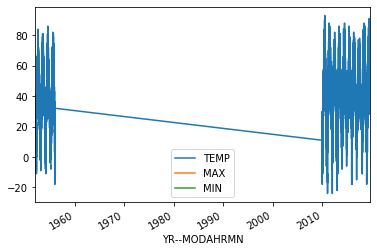

In [5]:
ax = data.plot()

If all goes well, you should see the plot above.

OK, so what happened here?

1. We first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis.
2. In case we want to be able to modify the plot or add anything, we assign the plot object to the variable `ax`. We can check its type below.

In fact, let's check the type of the `ax` variable...

In [6]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

OK, so it looks like we have some kind of plot data type that is part of Matplotlib. Clearly, Pandas is using Matplotlib for generating our plots.

### Selecting our plotted data

Now, let's make a few small changes to our plot and plot the data again. First, let's only plot the observed temperatures in the `data['TEMP']` column, and let's restrict ourselves to observations from the afternoon of October 1, 2019 (the last day in our dataset). We can do this by selecting the desired data column and date range first, then plotting our selection.

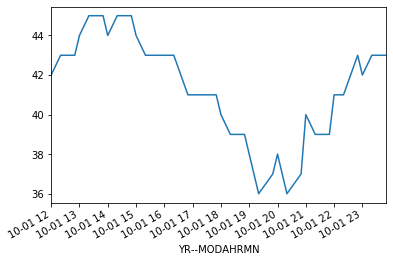

In [7]:
oct1_temps = data['TEMP'].loc[data.index >= '201910011200']
ax = oct1_temps.plot()

So, what did we change?

1. Well, we selected only the `'TEMP'` column now by using `data['TEMP']` instead of `data`.
2. We've added a restriction to the date range using `loc[]` to select only rows where the index value `data.index` is greater than `'201910011200'`. In that case, the number in the string is in the format `'YYYYMMDDHHMM'`, where `YYYY` is the year, `MM` is the month, `DD` is the day, `HH` is the hour, and `MM` is the minute. Now we have all observations from noon onward on October 1, 2019.
3. By saving this selection to the DataFrame `oct1_temps` we're able to now use `oct1_temps.plot()` to plot only our selection. This is cool, but we can do even better...

## Basic plot formatting

We can make our plot look a bit nicer and provide more information by using a few additional plotting options to Pandas/Matplotlib.

Text(0, 0.5, 'Temperature [°F]')

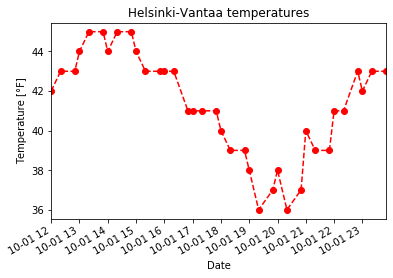

In [8]:
ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')

Now we see our temperature data as a red dashed line with circles showing the data points.
This comes from the additional `style='ro--'` used with `oct1_temps.plot()`.
In this case, `r` tells the `oct1_temps.plot()` function to use red color for the lines and symbols, `o` tells it to show circles at the points, and `--` says to use a dashed line.
You can use `help(oct1_temps.plot)` to find out more about formatting plots or have a look at the [documentation on the Pandas website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html#pandas.DataFrame.plot.line).
We have also added a title using the `title` parameter, but note that axis labels are assigned using the `set_xlabel()` and `set_ylabel()` methods.
As you can see in this case, by assigning the plot axes to the variable `ax`

In [9]:
help(oct1_temps.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame using the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'scatter' : scatter plot
 |

### Embiggening\* the plot

While the plot sizes we're working with are OK, it would be nice to have them displayed a bit larger.
Fortunately, there is an easy way to make the plots larger in Jupyter notebooks.
First, we need to import the [Matplotlib pyplot library](https://matplotlib.org/api/pyplot_api.html), then we can make the default plot size larger by running the Python cell below.

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]

The cell above sets the default plot size to be 12 inches wide by 6 inches tall.
Feel free to change these values if you prefer.

To test whether this is working as expected, simply re-run one of the earlier cells that generated a plot.

\* To [embiggen](https://www.lexico.com/definition/embiggen) means to enlarge.
It's a perfectly [cromulent](https://www.lexico.com/definition/cromulent) word.

### Other common plot formatting operations

#### Adding text to the plot

Adding text to plots can be done using `ax.text()`.

```python
ax.text(x, y, 'Text to display')
```

This would display "Text to display" at the location *x*, *y* on the plot.
We'll see how to do this in a live example in just a second.

#### Changing the axis ranges

Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function

```python
df.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])
```

where `xmin` should be the minimum bound of the x-axis, `xmax` should be the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`.

#### Dealing with datetime axes

One issue we will encounter with both placing text on the plot and changing the axis ranges is our datetime index for our DataFrame. In order to do either thing, we need to define x-values using a datetime object. The easiest way to do this is to use the Pandas `pd.to_datetime()` function, which converts a character string date to a datetime object. For example, we can convert 13:00 on October 1, 2019 from the character string `'201910011300'` to a datetime equivalent by typing

In [11]:
pd.to_datetime('201910011300')

Timestamp('2019-10-01 13:00:00')

With this datetime issue in mind, let's now consider a modified version of the plot above, we can

1. Limit our time range to 12:00 to 15:00 on October 1, 2019
2. Only look at temperatures between 40-46° Fahrenheit
3. Add text to note the coldest part of the early afternoon.

Text(2019-10-01 12:05:00, 42.0, '<- Coldest temperature in early afternoon')

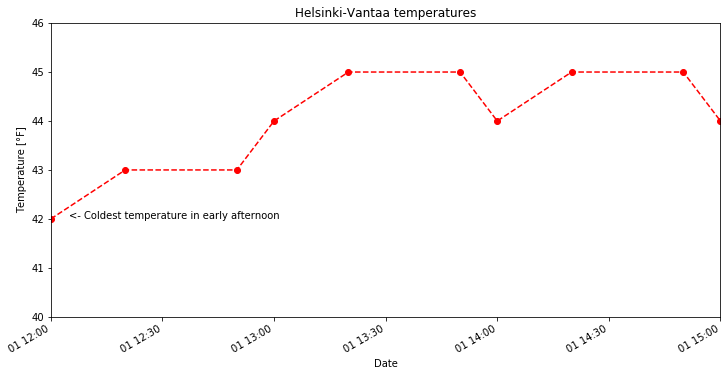

In [12]:
start_time = pd.to_datetime('201910011200')
end_time = pd.to_datetime('201910011500')
cold_time = pd.to_datetime('201910011205')

ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures',
                     xlim=[start_time, end_time], ylim=[40.0, 46.0])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(cold_time, 42.0, '<- Coldest temperature in early afternoon')

### Check your understanding

Create a line plot similar to our examples above with the following attributes:
    
- Temperature data from 18:00-24:00 on October 1, 2019
- A dotted black line connecting the observations (do not show the data points)
- A title that reads "Evening temperatures on October 1, Helsinki-Vantaa"
- A text label indicating the warmest temperature in the evening

Text(2019-10-01 21:20:00, 43.0, 'Warmest time of the evening ->')

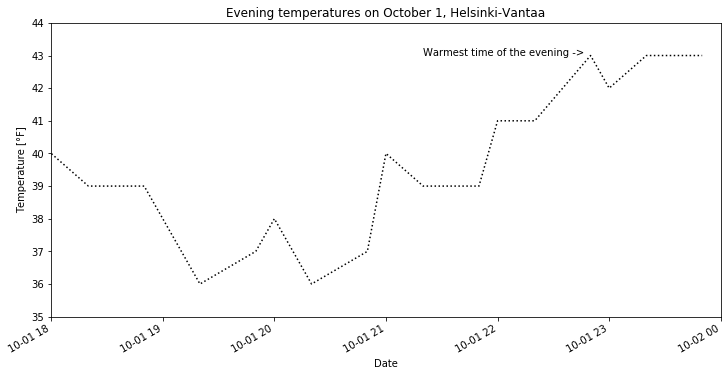

In [13]:
# Define start, end, and cold times
start_time = pd.to_datetime('201910011800')
end_time = pd.to_datetime('201910020000')
warm_time = pd.to_datetime('201910012120')

# Plot data (add x, y limits)
ax = oct1_temps.plot(style='k:', title='Evening temperatures on October 1, Helsinki-Vantaa',
                     xlim=[start_time, end_time], ylim=[35.0, 44.0])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')

# Display text on plot
ax.text(warm_time, 43.0, 'Warmest time of the evening ->')

## Bar plots in Pandas

In addition to line plots, there are many other options for plotting in Pandas.
Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter.
Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. Pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed.

Text(0, 42.1, 'Coldest \ntemp \nv')

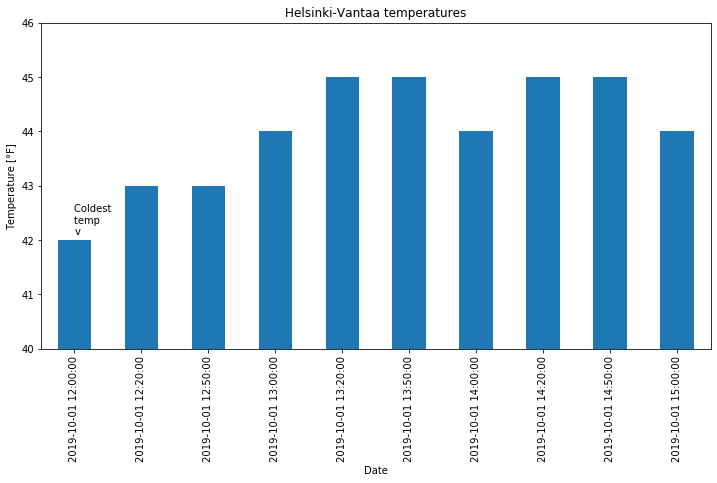

In [14]:
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= '201910011500']
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures',
                         ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.1, 'Coldest \ntemp \nv')

You can find more about how to format bar charts on the [Pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

## Saving your plots as image files

Saving plots created using Pandas can be done in several ways.
The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function.
When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell.
The file name is required, and the image format will be determined based on the listed file extension.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS.
PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics.
Let's check out an example and save our lovely bar plot.

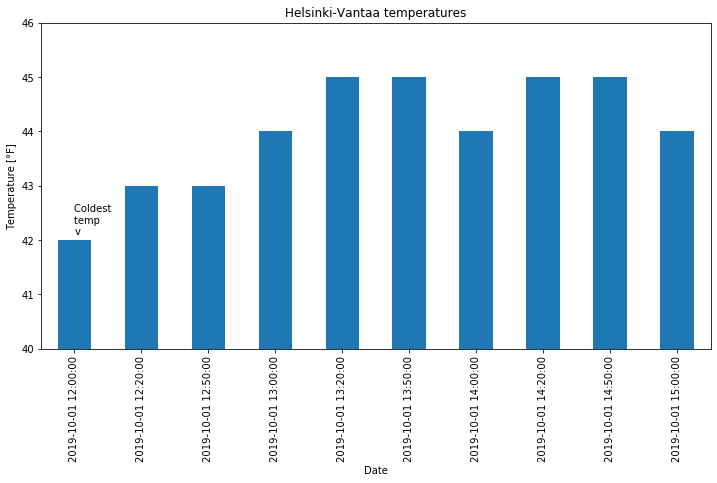

In [15]:
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures',
                         ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.1, 'Coldest \ntemp \nv')

plt.savefig('bar-plot.png')

If you refresh your **Files** tab on the left side of the JupyterLab window you should now see `bar-plot.png` listed.
We could try to save another version in higher resolution with a minor change to our plot commands above.

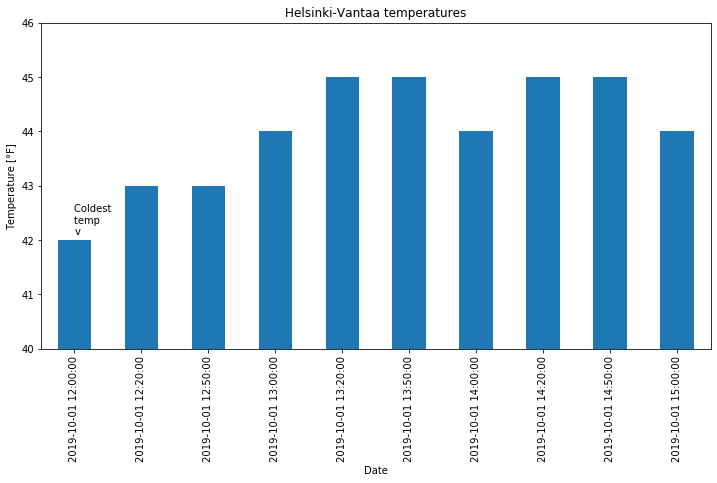

In [16]:
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures',
                         ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.1, 'Coldest \ntemp \nv')

plt.savefig('bar-plot-hi-res.pdf', dpi=600)

## Interactive plotting with Pandas-Bokeh (optional)

One of the cool things in Jupyter notebooks is that our plots need not be static. We can easily create plots that are interactive, allowing us to view data values by mousing over them, or click to enable/disable plotting of some data. There are several ways we can do this, but we'll utilize the [Pandas-Bokeh plotting backend](https://github.com/PatrikHlobil/Pandas-Bokeh), which allows us to create interactive plots with little additional effort.

To get started, we need to import Pandas-Bokeh and configure our notebook to use it for plotting out Pandas data.

In [17]:
import pandas_bokeh

pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

In the cell above, we import Pandas-Bokeh, and the configure two options: (1) Setting the output to be displayed in a notebook rather than in a separate window, and (2) setting the plotting backend software to use Pandas-Bokeh rather than Matplotlib.

Now, we can consider an example plot similar to the one we started with, but with data for three days (September 29-October 1, 2019). Pandas-Bokeh expects a DataFrame as the source for the plot data, so we'll need to create a time slice of the `data` DataFrame containing the desired date range before making the plot. Let's generate the Pandas-Bokeh plot and the see what is different.

In [18]:
sept29_oct1_df = data.loc[data.index >= '201909290000']

start_time = pd.to_datetime('201909290000')
end_time = pd.to_datetime('201910020000')

ax = sept29_oct1_df.plot(title='Helsinki-Vantaa temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 60.0])

So now we have a similar plot to those generated previously, but when you move the mouse along the curve you can see the temperature values at each time. We can also hide any of the lines by clicking on them in the legend, as well as use the scroll wheel/trackpad to zoom.

But we did also have to make a few small changes to generate this plot:

1. We need to use a DataFrame as the data source for the plot, rather than a Pandas Series. Thus, `data['TEMP'].plot()` will not work with Pandas-Bokeh.
2. The x- and y-axis labels are specified using the `xlabel` and `ylabel` parameters, rather than using `ax.set_xlabel()` or `ax.set_ylabel()`.
3. The line color and plotting of points are not specified using the `style` keyword. Instead, the line colors could be specified using the `color` or `colormap` parameters. Plotting of the points is enabled using the `plot_data_points` parameter (see below). More information about formatting the lines can be found on the [Pandas-Bokeh website](https://github.com/PatrikHlobil/Pandas-Bokeh).
4. We have not included a text label on the plot, as it may not be possible to do so with Pandas-Bokeh.

But otherwise, we are able to produce these cool interactive plots with minimal effort, and directly within our notebooks!

In [19]:
ax = sept29_oct1_df.plot(title='Helsinki-Vantaa temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 60.0],
                         plot_data_points=True)